<a href="https://colab.research.google.com/github/h0806449f/PyTorch/blob/main/DB_00_fundamentals.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

These Pytorch course from :  
DB : https://www.youtube.com/@mrdbourke/videos

# Workflow
1. Get data ready (資料預處理)
2. Build model  
    2.1 Pick loss function & optimizer  
    2.2 Build training loop
3. Fit data to model then make prediction
4. Evaluate model
5. Improve model
6. Save model (For reuse)

# Preparing

In [2]:
# check torch version

import torch
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

print(torch.__version__)

2.0.1+cu118


In [3]:
# check GPU

!nvidia-smi

/bin/bash: nvidia-smi: command not found


# Create tensors
1. scalar 慣用變數 lower(a)
2. vector 慣用變數 lower(y)
3. matrix 慣用變數 Upper(Q)
4. tensor 慣用變數 Upper(X)

In [4]:
# scalar
scalar = torch.tensor(9)

# scalar's number of dimension
scalar.ndim

# Get tensor back as python int (取出tensor中的資料)
scalar.item()

print(f"scalar's dimension: {scalar.ndim} / info: {scalar.item()}")

scalar's dimension: 0 / info: 9


In [5]:
# Vector
vector = torch.tensor( [7, 7] )

# vector's number of dimension
vector.ndim

# check shape
vector.shape

print(f"vector's dimension: {vector.ndim} / shape: {vector.shape} / info: {vector}")

vector's dimension: 1 / shape: torch.Size([2]) / info: tensor([7, 7])


In [6]:
# MATRIX
MATRIX = torch.tensor( [[7, 8],
              [9, 10]] )

# matrix's number of dimension
MATRIX.ndim

# check shape
MATRIX.shape

print(f"matrix's dimension: {MATRIX.ndim}\nshape: {MATRIX.shape}\ninfo:\n{MATRIX}")

matrix's dimension: 2
shape: torch.Size([2, 2])
info:
tensor([[ 7,  8],
        [ 9, 10]])


In [7]:
# TENSOR
TENSOR = torch.tensor( [[[1, 2, 3],
               [4, 5, 6],
               [7, 8, 9]]] )

# number of dimension
TENSOR.ndim

# check shape
TENSOR.shape

print(f"tensor's dimension: {TENSOR.ndim}\nshape: {TENSOR.shape}\ninfo:\n{TENSOR}")

tensor's dimension: 3
shape: torch.Size([1, 3, 3])
info:
tensor([[[1, 2, 3],
         [4, 5, 6],
         [7, 8, 9]]])


In [8]:
# 拿出第一個 tensor
TENSOR[0]

# if TENSOR[1]
# -> IndexError: index 1 is out of bounds for dimension 0 with size 1

tensor([[1, 2, 3],
        [4, 5, 6],
        [7, 8, 9]])

In [9]:
# 練習
test_1 = torch.tensor( [[[0,0,0],
               [0,0,0],
               [0,0,0]],
               [[1,1,1],
               [1,1,1],
               [1,1,1]]] )

# number of dimension
test_1.ndim

# shape
test_1.shape

print(f"tensor's dimension: {test_1.ndim}\nshape: {test_1.shape}\ninfo:\n{test_1}")
print(f"取出第二個:\n{test_1[1]}")

tensor's dimension: 3
shape: torch.Size([2, 3, 3])
info:
tensor([[[0, 0, 0],
         [0, 0, 0],
         [0, 0, 0]],

        [[1, 1, 1],
         [1, 1, 1],
         [1, 1, 1]]])
取出第二個:
tensor([[1, 1, 1],
        [1, 1, 1],
        [1, 1, 1]])


# Random tensor
1. 為何使用Random tensor  
    CNN先隨機給係數, 之後再由網絡調整

In [10]:
# create random tensor
random_tensor = torch.rand(3, 4, 4)

print(f"first:\n{random_tensor[0]}\nsecond:\n{random_tensor[1]}")

first:
tensor([[0.0586, 0.2903, 0.8099, 0.5269],
        [0.4202, 0.6191, 0.7305, 0.4204],
        [0.7239, 0.9674, 0.1957, 0.9289],
        [0.7111, 0.9494, 0.5216, 0.5376]])
second:
tensor([[0.6046, 0.1861, 0.3131, 0.0698],
        [0.2878, 0.1904, 0.5684, 0.3080],
        [0.5317, 0.7776, 0.8042, 0.0146],
        [0.5482, 0.3306, 0.0299, 0.8681]])


In [11]:
# 與圖片相似的random tensor
image = torch.rand(size=(224, 224, 3))

print(f"dimension:{image.ndim}\nshape:\n{image.shape}")

dimension:3
shape:
torch.Size([224, 224, 3])


# 0 & 1 tensor
1. 為何使用0, 1 tensor  
    與之後的Mask有關聯

In [12]:
# zero and one
zeros = torch.zeros(size=(1, 4, 4))
ones = torch.ones(size=(2, 4, 4))
print(ones)

tensor([[[1., 1., 1., 1.],
         [1., 1., 1., 1.],
         [1., 1., 1., 1.],
         [1., 1., 1., 1.]],

        [[1., 1., 1., 1.],
         [1., 1., 1., 1.],
         [1., 1., 1., 1.],
         [1., 1., 1., 1.]]])


In [13]:
# Mask (shape需相同, 才可以相乘)
masked_tensor = random_tensor[0] * zeros
print(masked_tensor)

tensor([[[0., 0., 0., 0.],
         [0., 0., 0., 0.],
         [0., 0., 0., 0.],
         [0., 0., 0., 0.]]])


# Range tensor & tensor-like

In [15]:
range = torch.arange(start=0, end=16, step=3)
range_1 = torch.arange(0, 21, 2)

range, range_1

(tensor([ 0,  3,  6,  9, 12, 15]),
 tensor([ 0,  2,  4,  6,  8, 10, 12, 14, 16, 18, 20]))

In [16]:
# 創造與之前tensor相同shape 的新tensor 
zeros = torch.zeros_like(input=range_1)
ones = torch.ones_like(input=range_1)
zeros, ones

(tensor([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]),
 tensor([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]))

# Starts from 1:54:22

# Tensor datatypes
1. tensor.dtype
2. tensor.shape
3. tensor.device  

Checking tensor information

In [ ]:
# default : float32
temp_tensor = torch.tensor( [3.0, 6.0, 9.0],
                 dtype=None,   # datatype
                 device=None,   # CPU or GPU -> colab : "cuda"
                 requires_grad=False)   # track gradients operation ?
temp_tensor

tensor([3., 6., 9.])

In [ ]:
print(f"tensor datatype: {temp_tensor.dtype}")
print(f"tensor shape: {temp_tensor.shape}")
print(f"tensor device: {temp_tensor.device}")

tensor datatype: torch.float32
tensor shape: torch.Size([3])
tensor device: cpu


# Manipulating tensor (tensor operation)
1. Addition
2. Subtraction
3. Multiplication (element-wise)
4. Devision
5. Matrix multiplication
    1. 兩種常見 multiplication 方法:
    2. Element-wise
    3. Matrix multiplication

In [ ]:
temp_tensor = torch.tensor( [[1, 2, 3],
                 [4, 5, 6]] )
temp_tensor + 10

tensor([[11, 12, 13],
        [14, 15, 16]])

In [ ]:
temp_tensor - 10

tensor([[-9, -8, -7],
        [-6, -5, -4]])

In [ ]:
often = temp_tensor * 5
seldom = torch.mul(temp_tensor, 5)

often, seldom

(tensor([[ 5, 10, 15],
         [20, 25, 30]]),
 tensor([[ 5, 10, 15],
         [20, 25, 30]]))

In [ ]:
often = temp_tensor / 2
seldom = torch.div(temp_tensor, 2)

often, seldom

(tensor([[0.5000, 1.0000, 1.5000],
         [2.0000, 2.5000, 3.0000]]),
 tensor([[0.5000, 1.0000, 1.5000],
         [2.0000, 2.5000, 3.0000]]))

Matrix multiplication (dot product)  
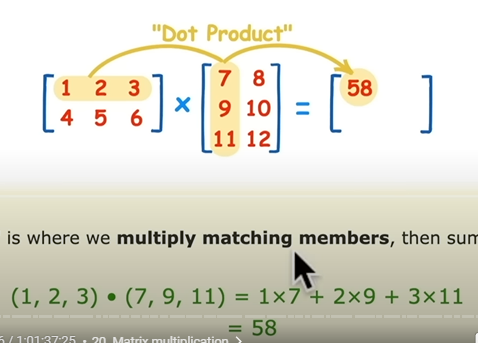

In [ ]:
# element wise
temp_tensor = torch.tensor( [1, 2, 3] )

print(temp_tensor, "*", temp_tensor)
print(f"result: {temp_tensor * temp_tensor}")

tensor([1, 2, 3]) * tensor([1, 2, 3])
result: tensor([1, 4, 9])


In [ ]:
# Matrix multiplication
# 運算時間
%%time

torch.matmul(temp_tensor, temp_tensor)
# 1*1 + 2*2 + 3*3

CPU times: user 650 µs, sys: 0 ns, total: 650 µs
Wall time: 481 µs


tensor(14)

In [ ]:
# 使用 Matrix multiplication 需要注意
# 1. inner dimensions "must" match   -> (3,2) @ (2,3) acceptable
#                        (3,2) @ (3,2) won't work !!!

# 2. 運算結果將與 outer dimensions 相同
# (3,2) @ (2,3)   -> (3,3)
# (2,3) @ (3,2)   -> (2,2)

# 詳細運算過程 可以參考 : http://matrixmultiplication.xyz/

In [ ]:
# 使用 Matrix multiplication 需要注意 (shape errors)
tensor_A = torch.tensor( [[1, 2],
               [3, 4],
               [5, 6]] )

tensor_B = torch.tensor( [[7, 10],
               [8, 11],
               [9, 12]] )

torch.matmul(tensor_A, tensor_B)   # torch.mm
# shape error

In [ ]:
# 解決 shape error   -> transpose -> switch the axes or dimensions of a given tensor

torch.matmul(tensor_A, tensor_B.T)

tensor([[ 27,  30,  33],
        [ 61,  68,  75],
        [ 95, 106, 117]])

# Aggregation
min, max, mean, sum, etc ...

In [ ]:
temp_tensor = torch.tensor( [[[1,2,3],
                [4,5,6],
                [7,8,9]]])
# min
temp_tensor.min()

# max
temp_tensor.max()

# mean
# temp_tensor.mean()   # got an error : Got: Long  解法第13行
# temp_tensor.dtype   # torch.int64 not support for mean()
torch.mean(temp_tensor.type(torch.float32))

# sum
temp_tensor.sum()

tensor(45)

In [ ]:
# max number's index
# 會先將 tensor 一維化

# min
temp_tensor.argmin()

# max
temp_tensor.argmax()

# 

tensor(0)

# Reshaping, stacking, squeezing, unsqueezing tensor
1. Reshaping
2. View
3. Stacking : vstack & hstack
4. Squeezing : removes all "1" dimensions from a tensor
5. Unsqueezing : add a "1" dimensions to a target tensor
6. Permute : Return a view of a swapped tensor

In [ ]:
# Create tensor

x = torch.arange(1, 10)
x, x.shape

(tensor([1, 2, 3, 4, 5, 6, 7, 8, 9]), torch.Size([9]))

In [ ]:
# Reshape (理解 : 內容總數量需一致)

x_reshaped = x.reshape(1,9)
x_reshaped, x_reshaped.shape   # shape from 9 to [1, 9]

x_reshaped_1 = x.reshape(9,1)
x_reshaped_1, x_reshaped_1.shape   # shape from 9 to [9, 1]

x_reshaped_2 = x.reshape(3,3) 
x_reshaped_2, x_reshaped_2.shape   # shape from 9 to [3, 3]

(tensor([[1, 2, 3],
         [4, 5, 6],
         [7, 8, 9]]),
 torch.Size([3, 3]))

In [ ]:
# View (z 將與 x 共享記憶體 -> 改變z將連同x一起改變)

z = x.view(1, 9)

z[:, 0] = 100
z, x

(tensor([[100,   2,   3,   4,   5,   6,   7,   8,   9]]),
 tensor([100,   2,   3,   4,   5,   6,   7,   8,   9]))

In [ ]:
# Stack tensor

x_stacked = torch.stack([x, x, x, x, x], dim=0)   # vstack
x_stacked, x_stacked.shape   # (5, 9)

x_stacked_1 = torch.stack([x, x, x, x, x], dim=1)   # hstack
x_stacked_1, x_stacked_1.shape   # (9, 5)

(tensor([[100,   2,   3,   4,   5,   6,   7,   8,   9],
         [100,   2,   3,   4,   5,   6,   7,   8,   9],
         [100,   2,   3,   4,   5,   6,   7,   8,   9],
         [100,   2,   3,   4,   5,   6,   7,   8,   9],
         [100,   2,   3,   4,   5,   6,   7,   8,   9]]),
 torch.Size([5, 9]))

In [ ]:
# Squeeze - 去除 "所有" 1的 dimension 

x_reshaped, x_reshaped.shape   # torch.Size([1, 9])

x_reshaped.squeeze(), x_reshaped.squeeze().shape   # torch.Size([9])

(tensor([100,   2,   3,   4,   5,   6,   7,   8,   9]), torch.Size([9]))

In [ ]:
temp_tensor = torch.rand(size=(3, 1, 3))
temp_tensor, temp_tensor.shape   # (3,1,3)

temp_tensor.squeeze(), temp_tensor.squeeze().shape   # torch.Size([3, 3])

(tensor([[0.3947, 0.0470, 0.2509],
         [0.0232, 0.3202, 0.4840],
         [0.8590, 0.1088, 0.1518]]),
 torch.Size([3, 3]))

In [ ]:
# Unsqueeze - 在指定的 dimension 外，增加一層

temp_tensor.shape   # torch.Size([3, 1, 3])

temp_tensor.unsqueeze(dim=0).shape   # 第0層"外" 增加一層  torch.Size([1, 3, 1, 3])

temp_tensor.unsqueeze(dim=1).shape   # 第1層"外" 增加一層  torch.Size([3, 1, 1, 3])

torch.Size([3, 1, 1, 3])

In [ ]:
# Permute

temp_tensor = torch.rand(size=(3, 3, 2, 2))

temp_tensor.permute( (3,1,2,0) ).shape
# size 3   index 0
#    3   index 1
#    2   index 2
#    2   index 3
# 使用index 重新指定順序

# 常用場景 : 更換圖片資訊的顯示順序
image = torch.rand(size=(224, 224, 3))   # 一張224*224的彩色圖片 [height, width, color_channels]

image_p = image.permute( (2, 0, 1) )   # [color_channels, height, width]
image_p.shape   # torch.Size([3, 224, 224])

torch.Size([3, 224, 224])

# Indexing
Selecing data from tensors

In [ ]:
# Create a tensor

temp_tensor = torch.arange(1, 10).reshape(1, 3, 3)
temp_tensor, temp_tensor.shape

(tensor([[[1, 2, 3],
          [4, 5, 6],
          [7, 8, 9]]]),
 torch.Size([1, 3, 3]))

In [ ]:
temp_tensor[0][1]

tensor([4, 5, 6])

In [ ]:
temp_tensor[0][2][2]

tensor(9)

In [ ]:
# 練習 

temp_tensor[:, :, 1]
# # 0 層 全取     -> 此層也會被取下
# # 1 層 全取     -> 此層也會被取下
# # 2 層 僅取第2個值

tensor([[2, 5, 8]])

# Pytorch tensor & Numpy
1. torch.from_numpy(ndarray)
2. torch.Tensor.numpy()

In [ ]:
# Numpy array to tensor
import torch
import numpy as no


array = np.arange(1.0, 10.0)
array   # array([1, 2, 3, 4, 5, 6, 7, 8, 9])

tensor = torch.from_numpy(array)
array,array.dtype, tensor, tensor.dtype   # 直接轉換 default data type 轉為 float64

(array([1., 2., 3., 4., 5., 6., 7., 8., 9.]),
 dtype('float64'),
 tensor([1., 2., 3., 4., 5., 6., 7., 8., 9.], dtype=torch.float64),
 torch.float64)

In [ ]:
torch.arange(1.0, 9.0).dtype   # 但是 torch 本身的預設是 float 32

# 轉換回來
tensor = torch.from_numpy(array).type(torch.float32)
tensor.dtype

torch.float32

In [ ]:
# Tensor to Numpy array

tensor = torch.ones(7)
numpy_tensor = tensor.numpy()

numpy_tensor   # tensor default datatype is float32 所以轉到numpy時 numpy 的datatype也是float32

array([1., 1., 1., 1., 1., 1., 1.], dtype=float32)

# Reproducbility
  
1. 隨機產生參數  
2. tensor operation -> 更新參數  
3. tensor operation -> 更新參數  

循環直到loss最小

為了減少一開始的參數握過於隨機 -> random seed

In [ ]:
# create two tensors
random_tensor_A = torch.rand(3,4)
random_tensor_B = torch.rand(3,4)

print(random_tensor_A)
print(random_tensor_B)
print(random_tensor_A == random_tensor_B)

tensor([[0.4827, 0.5529, 0.5562, 0.1208],
        [0.0822, 0.9345, 0.7090, 0.8477],
        [0.3716, 0.9532, 0.8195, 0.8254]])
tensor([[0.3553, 0.4172, 0.0912, 0.2364],
        [0.9655, 0.9673, 0.2406, 0.6404],
        [0.9981, 0.1956, 0.0534, 0.9244]])
tensor([[False, False, False, False],
        [False, False, False, False],
        [False, False, False, False]])


In [ ]:
# 設置 random_seed (使用相同的random_seed 就會產生相同的隨機係數)
RANDOM_SEED = 42

torch.manual_seed(RANDOM_SEED)
random_tensor_C = torch.rand(3,4)

torch.manual_seed(RANDOM_SEED)
random_tensor_D = torch.rand(3,4)

print(random_tensor_C)
print(random_tensor_D)
print(random_tensor_C == random_tensor_D)

tensor([[0.8823, 0.9150, 0.3829, 0.9593],
        [0.3904, 0.6009, 0.2566, 0.7936],
        [0.9408, 0.1332, 0.9346, 0.5936]])
tensor([[0.8823, 0.9150, 0.3829, 0.9593],
        [0.3904, 0.6009, 0.2566, 0.7936],
        [0.9408, 0.1332, 0.9346, 0.5936]])
tensor([[True, True, True, True],
        [True, True, True, True],
        [True, True, True, True]])


# Use GPU for Pytorch
1. Colab
2. 本機(https://pytorch.org/get-started/locally/)
3. Cloud computing